# **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

# **Data Loading & Setting**

In [2]:
# DATA_2017 = pd.read_excel("./data/2017년 주가 기본 데이터.xlsx")
# DATA_2018 = pd.read_excel("./data/2018년 주가 기본 데이터.xlsx")
# DATA_2019 = pd.read_excel("./data/2019년 주가 기본 데이터.xlsx")

# 경동
# data_2017 = DATA_2017[DATA_2017["code"] == "012320"]
# data_2018 = DATA_2018[DATA_2018["code"] == "012320"]
# data_2019 = DATA_2019[DATA_2019["code"] == "012320"]

# CONCAT
# SKHYNIX = pd.concat([data_2017,data_2018,data_2019])
# SKHYNIX.to_csv("./data/SKHYNIX.csv", header=True)

# **경동인베스트 Dataset**

In [3]:
Kyungdong = pd.read_csv("./data/SKHYNIX.csv")
Kyungdong = Kyungdong[Kyungdong.columns[2:-1]]

# **Date**

In [4]:
Kyungdong["date"] = pd.to_datetime(Kyungdong["date"])
Kyungdong = Kyungdong.set_index("date")

# **EDA**

In [5]:
Kyungdong.head(10)

,open,high,low,close,trading_volume,trading_value
date,,,,,,
2017-01-02,44750,46000,44600,45800,1547681,70741238750
2017-01-03,46200,47300,46200,47250,2655477,124284065200
2017-01-04,47000,47150,46200,46500,2722599,127044173970
2017-01-05,47000,47500,46850,46950,2377163,112240246450
2017-01-06,47700,48450,47600,48000,3166843,152264047270
2017-01-09,48500,49750,48200,49550,3871999,191236382800
2017-01-10,49850,50200,49200,49750,2561968,127213145450
2017-01-11,50000,51900,50000,51600,4360058,223583642680
2017-01-12,51600,51600,50400,50600,5060622,256710131000


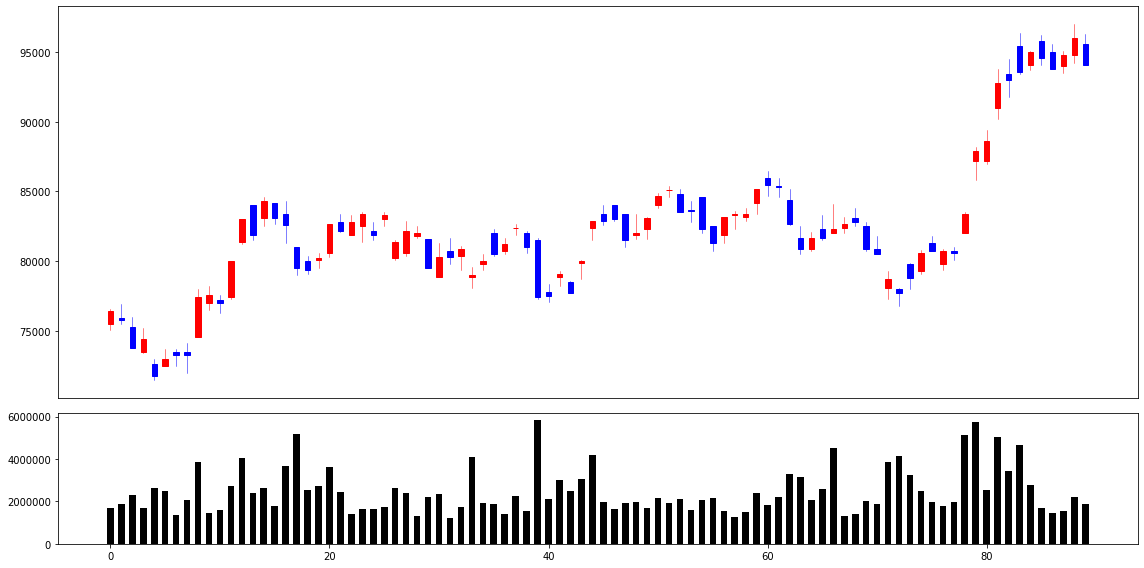

In [6]:
Kyungdong = Kyungdong[-90:]

# Candle Stick Chart
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 8))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)
# Graph
from mpl_finance import candlestick_ohlc
x = np.arange(len(Kyungdong.index))
ohlc = Kyungdong[['open', 'high', 'low', 'close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))
# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')
# 거래량 차트
axes[1].bar(x, Kyungdong.trading_volume, color='k', width=0.6, align='center')
plt.tight_layout()
plt.show()

#  **Train Test Split**

In [7]:
Kyungdong = pd.read_csv("./data/SKHYNIX.csv")
Kyungdong = Kyungdong[Kyungdong.columns[2:-1]]

In [8]:
Kyungdong["date"] = pd.to_datetime(Kyungdong["date"])
Kyungdong = Kyungdong.set_index("date")

In [9]:
split_date = pd.Timestamp("2019-09-30")
train = Kyungdong.loc[:split_date, ['close']]
test = Kyungdong.loc[split_date:, ['close']]

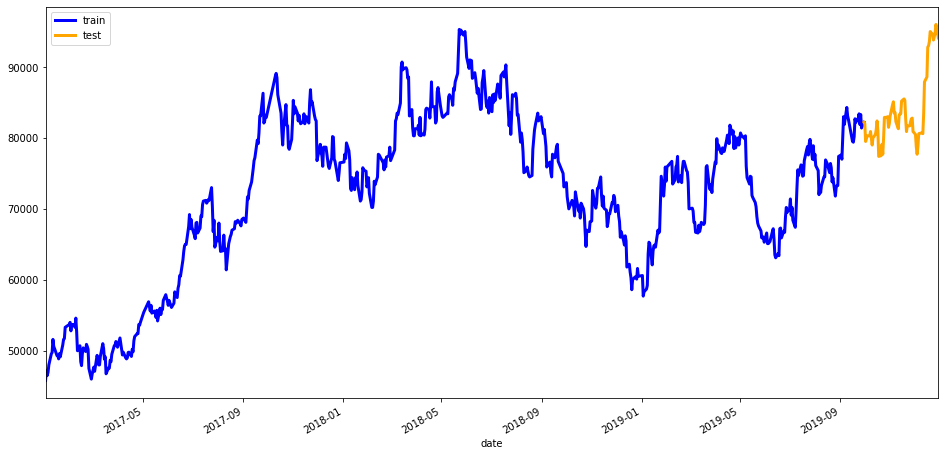

In [10]:
ax = train.plot(figsize=(16,8), color='b', linewidth=3)
test.plot(ax=ax, color='orange', linewidth=3)
plt.legend(['train', 'test'])
plt.show()

# **Data MinMaxSacling**

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# **Transform to Pandas DataFrame**

In [12]:
train_sc_df = pd.DataFrame(train_sc, columns=['close'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['close'], index=test.index)

# **Setting for Sliding Window**

In [13]:
for s in range(1, 13):
    train_sc_df['shift_-{}'.format(s)] = train_sc_df['close'].shift(s)
    test_sc_df['shift_-{}'.format(s)] = test_sc_df['close'].shift(s)

train_sc_df.head(15)

,close,shift_-1,shift_-2,shift_-3,shift_-4,shift_-5,shift_-6,shift_-7,shift_-8,shift_-9,shift_-10,shift_-11,shift_-12
date,,,,,,,,,,,,,
2017-01-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN,NaN
2017-01-12,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000,NaN,NaN,NaN,NaN


# **NaN Omit**

In [14]:
X_train = train_sc_df.dropna().drop('close', axis=1)
y_train = train_sc_df.dropna()[['close']]

In [15]:
X_test = test_sc_df.dropna().drop('close', axis=1)
y_test = test_sc_df.dropna()[['close']]

# **Final Train & Test**

In [16]:
X_train.head()

,shift_-1,shift_-2,shift_-3,shift_-4,shift_-5,shift_-6,shift_-7,shift_-8,shift_-9,shift_-10,shift_-11,shift_-12
date,,,,,,,,,,,,
2017-01-18,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293,0.000000
2017-01-19,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141,0.029293
2017-01-20,0.076768,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232,0.014141
2017-01-23,0.067677,0.076768,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444,0.023232
2017-01-24,0.101010,0.067677,0.076768,0.061616,0.070707,0.070707,0.090909,0.096970,0.117172,0.079798,0.075758,0.044444


In [17]:
y_train.head()

,close
date,
2017-01-18,0.061616
2017-01-19,0.076768
2017-01-20,0.067677
2017-01-23,0.101010
2017-01-24,0.117172


In [18]:
X_test.head()

,shift_-1,shift_-2,shift_-3,shift_-4,shift_-5,shift_-6,shift_-7,shift_-8,shift_-9,shift_-10,shift_-11,shift_-12
date,,,,,,,,,,,,
2019-10-18,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313,0.735354
2019-10-21,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808,0.731313
2019-10-22,0.640404,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970,0.680808
2019-10-23,0.672727,0.640404,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970,0.696970
2019-10-24,0.644444,0.672727,0.640404,0.638384,0.711111,0.739394,0.715152,0.701010,0.690909,0.670707,0.709091,0.696970


In [19]:
y_test.head()

,close
date,
2019-10-18,0.638384
2019-10-21,0.640404
2019-10-22,0.672727
2019-10-23,0.644444
2019-10-24,0.690909


# **ndarray to Tranform**

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# **Final Training Set & Test Set's X**

In [21]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

# **LSTM Model**

In [22]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation
K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


# **Model Fitting**

In [23]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
model.fit(X_train_t, y_train, epochs=1000, batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/1000
659/659 [==============================] - 1s 1ms/step - loss: 0.1993
Epoch 2/1000
659/659 [==============================] - 0s 268us/step - loss: 0.0254
Epoch 3/1000
659/659 [==============================] - 0s 244us/step - loss: 0.0104
Epoch 4/1000
659/659 [==============================] - 0s 256us/step - loss: 0.0083
Epoch 5/1000
659/659 [==============================] - 0s 244us/step - loss: 0.0072
Epoch 6/1000
659/659 [==============================] - 0s 250us/step - loss: 0.0066
Epoch 7/1000
659/659 [==============================] - 0s 250us/step - loss: 0.0061
Epoch 8/1000
659/659 [==============================] - 0s 245us/step - loss: 0.0057
Epoch 9/1000
659/659 [==============================] - 0s 232us/step - loss: 0.0055
Epoch 10/1000
659/659 [==============================] - 0s 238us/step - loss: 0.0054
Epoch 11/1000
659/659 [==============================] - 0s 229us/step - loss: 0.0053
Epoch 12/1000
659/659 [==============================] - 0s 229us

659/659 [==============================] - 0s 238us/step - loss: 0.0020
Epoch 97/1000
659/659 [==============================] - 0s 239us/step - loss: 0.0020
Epoch 98/1000
659/659 [==============================] - 0s 230us/step - loss: 0.0021
Epoch 99/1000
659/659 [==============================] - 0s 233us/step - loss: 0.0021
Epoch 100/1000
659/659 [==============================] - 0s 241us/step - loss: 0.0020
Epoch 101/1000
659/659 [==============================] - 0s 238us/step - loss: 0.0022
Epoch 102/1000
659/659 [==============================] - 0s 244us/step - loss: 0.0021
Epoch 103/1000
659/659 [==============================] - 0s 236us/step - loss: 0.0021
Epoch 104/1000
659/659 [==============================] - 0s 251us/step - loss: 0.0019
Epoch 105/1000
659/659 [==============================] - 0s 235us/step - loss: 0.0019
Epoch 106/1000
659/659 [==============================] - 0s 239us/step - loss: 0.0019
Epoch 107/1000
659/659 [==============================] - 0s 

# **Train Prediction**

In [24]:
# Pred
y_pred = model.predict(X_train_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

In [25]:
# Actual
REAL = pd.DataFrame(y_train)
REAL.columns = ["REAL"]

In [26]:
# Setting
RESULT = pd.concat([REAL,PRED], axis=1)
RESULT["date"] = train.index[12:]

In [27]:
# Set Index
RESULT = RESULT.set_index("date")

In [28]:
y_pred = model.predict(X_train_t)
y_pred = sc.inverse_transform(y_pred)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=train.index[:-12])

In [29]:
y_train = sc.inverse_transform(y_train)
y_train_df = pd.DataFrame(y_train, columns=['actual_price'], index=train.index[:-12])

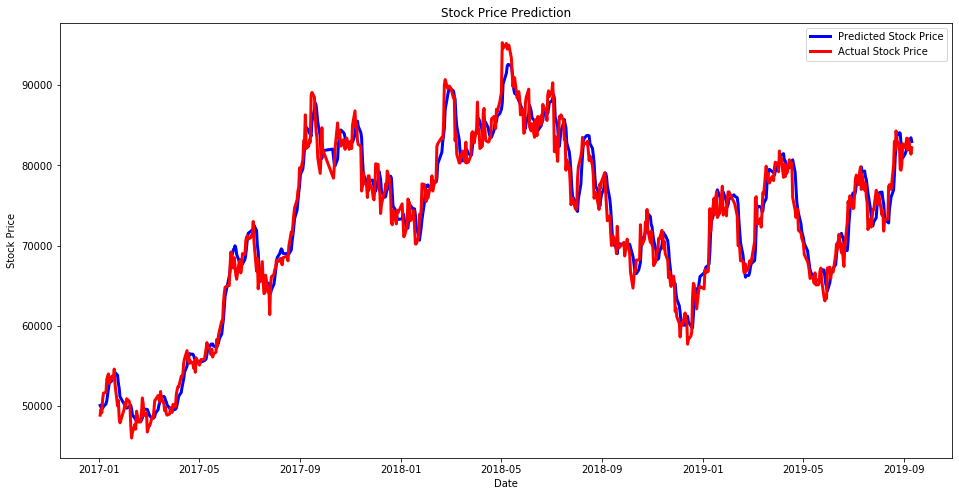

In [30]:
# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_train_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Test Prediction**

In [31]:
# Pred
y_pred = model.predict(X_test_t)
PRED = pd.DataFrame(y_pred)
PRED.columns = ["PRED"]

In [32]:
# Actual
REAL = pd.DataFrame(y_test)
REAL.columns = ["REAL"]

In [33]:
RESULT_TEST = pd.concat([REAL,PRED], axis=1)
RESULT_TEST["date"] = test.index[12:]

In [34]:
RESULT_TEST = RESULT_TEST.set_index("date")

# **Test Visualization**

In [35]:
y_pred = model.predict(X_test_t)
y_pred = sc.inverse_transform(y_pred)
y_pred_df = pd.DataFrame(y_pred, columns=['prediction'], index=test.index[12:])

In [36]:
y_test = sc.inverse_transform(y_test)
y_test_df = pd.DataFrame(y_test, columns=['actual_price'], index=test.index[12:])

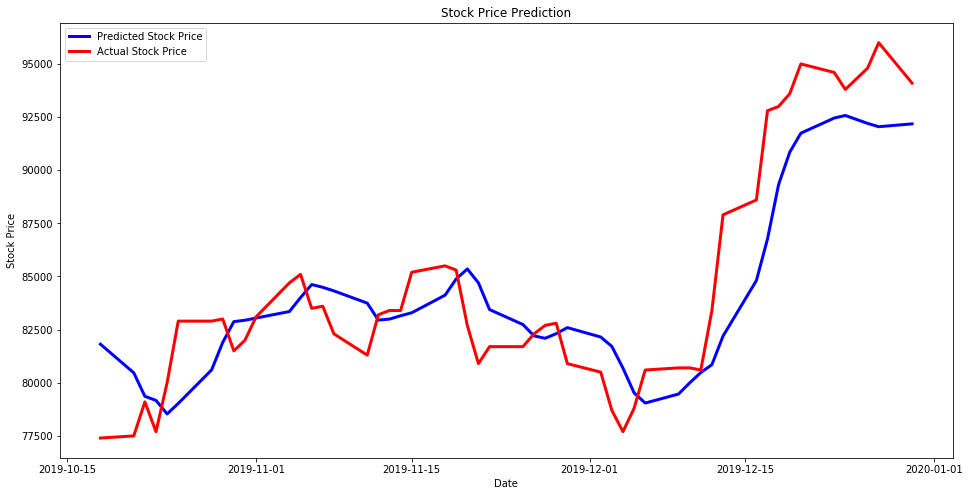

In [37]:
# plotting the results
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')
plt.plot(y_pred_df["prediction"], color = 'blue', label = 'Predicted Stock Price', linewidth = 3)
plt.plot(y_test_df["actual_price"], color = 'red', label = 'Actual Stock Price', linewidth = 3)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **RMSE**

In [38]:
forecast_error = y_test - y_pred
SS, RMSE = 0, 0
for i in forecast_error : 
    SS = SS + i * i
    RMSE = SS / len(forecast_error)
print("Test DataSet's RMSE : {}" .format(float(RMSE**0.5)))

Test DataSet's RMSE : 2370.326409204249
